In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import glob
import os

In [2]:
os.chdir("/content/drive/MyDrive/projects/Store_Sales-Time_Series_Forecasting/")
csv_list = glob.glob('store-sales-time-series-forecasting/*.csv')

for _csv in csv_list:
  df = pd.read_csv(_csv, index_col=0)
  print(_csv)
  print(df.isnull().sum().sum())

store-sales-time-series-forecasting/oil.csv
43
store-sales-time-series-forecasting/test.csv
0
store-sales-time-series-forecasting/holidays_events.csv
0
store-sales-time-series-forecasting/sample_submission.csv
0
store-sales-time-series-forecasting/stores.csv
0
store-sales-time-series-forecasting/train.csv
0
store-sales-time-series-forecasting/transactions.csv
0


In [3]:
df_oil = pd.read_csv("store-sales-time-series-forecasting/oil.csv", index_col=0)
df_oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [8]:
df_oil[df_oil.isnull().to_numpy()]

,dcoilwtico
date,
2013-01-01,NaN
2013-01-21,NaN
2013-02-18,NaN
2013-03-29,NaN
2013-05-27,NaN
2013-07-04,NaN
2013-09-02,NaN
2013-11-28,NaN
2013-12-25,NaN


In [14]:
df_sub = pd.read_csv("store-sales-time-series-forecasting/sample_submission.csv", index_col=0)
len(df_sub), 54*33

(28512, 1782)

In [29]:
df_train = pd.read_csv("store-sales-time-series-forecasting/train.csv", index_col=1, parse_dates=True)
print(df_train.columns)

Index(['id', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')


In [30]:
df_train.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [37]:
df_stores = pd.read_csv("store-sales-time-series-forecasting/stores.csv", index_col=0)
df_stores.head()

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


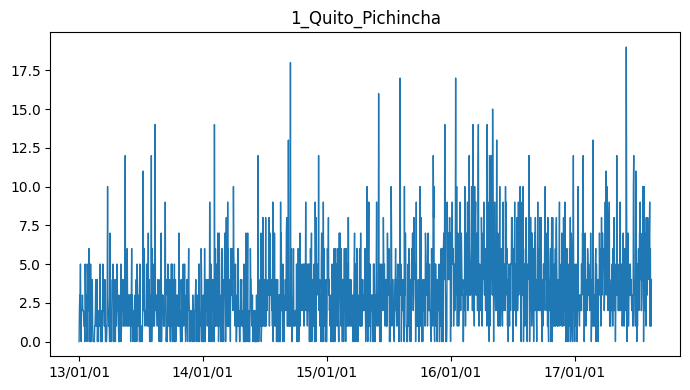

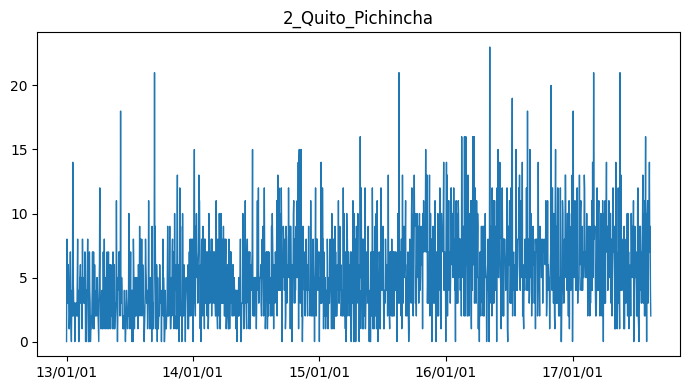

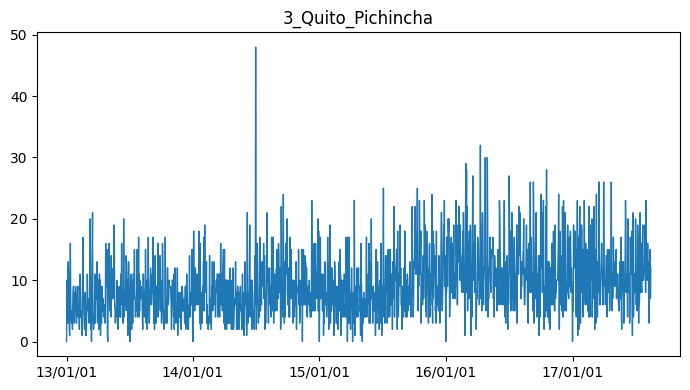

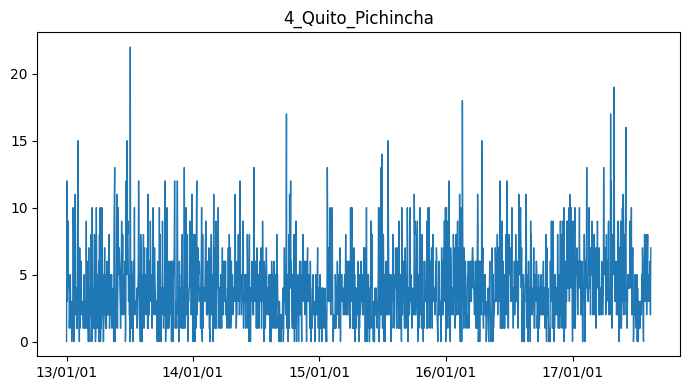

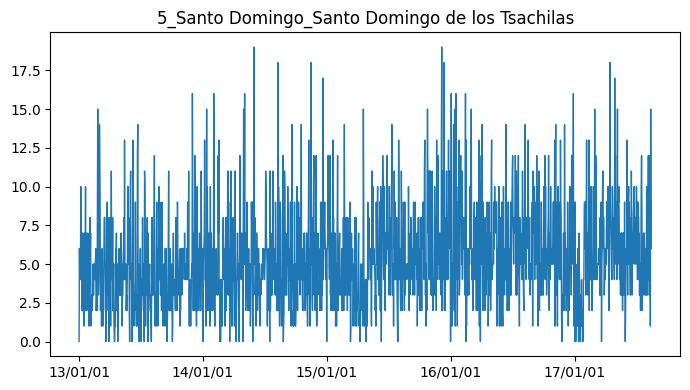

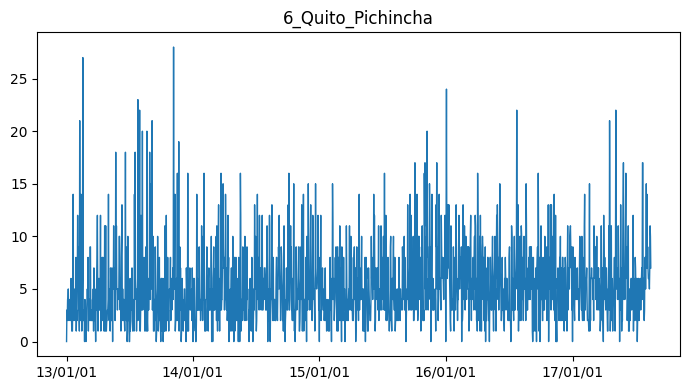

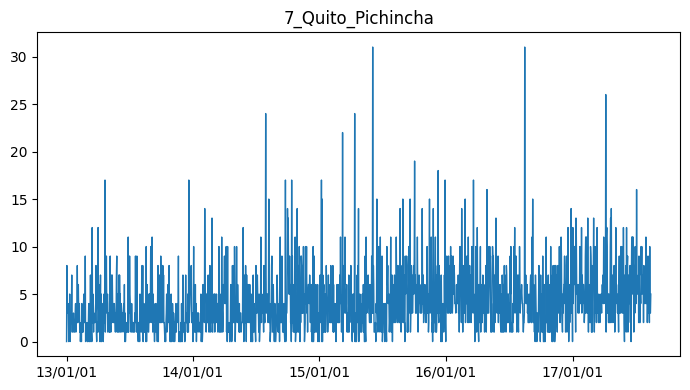

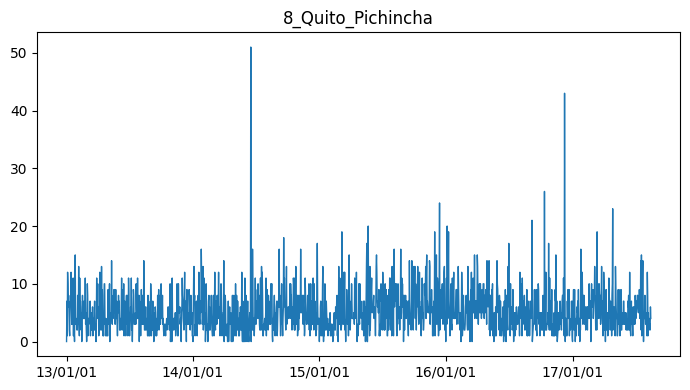

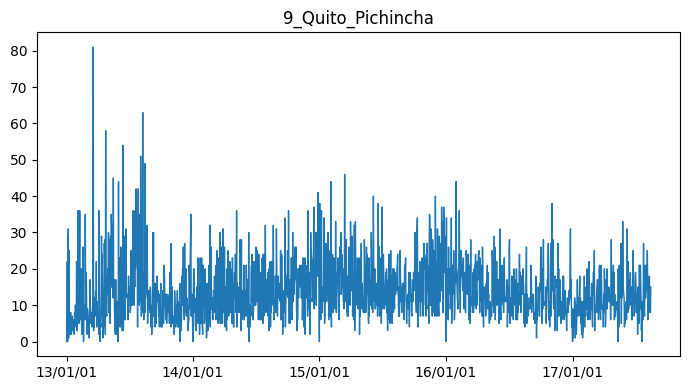

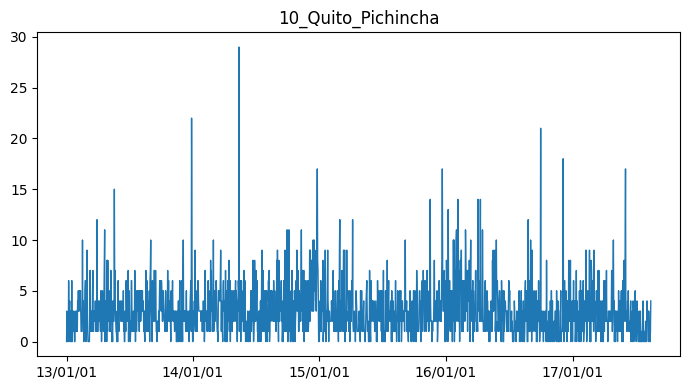

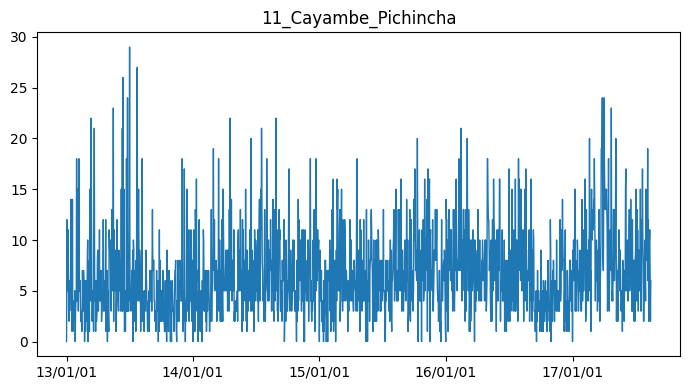

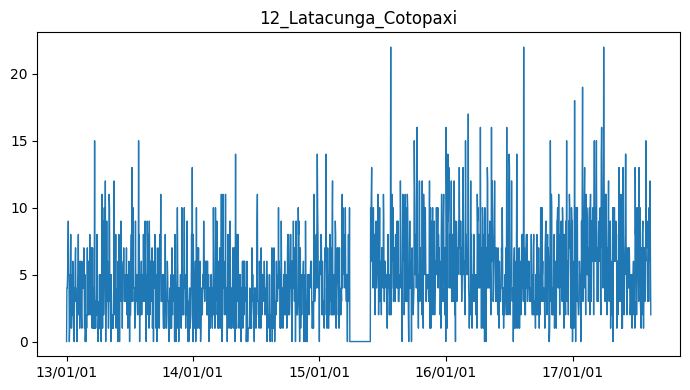

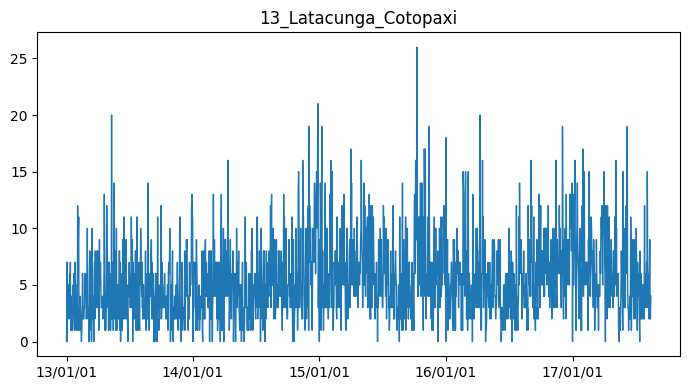

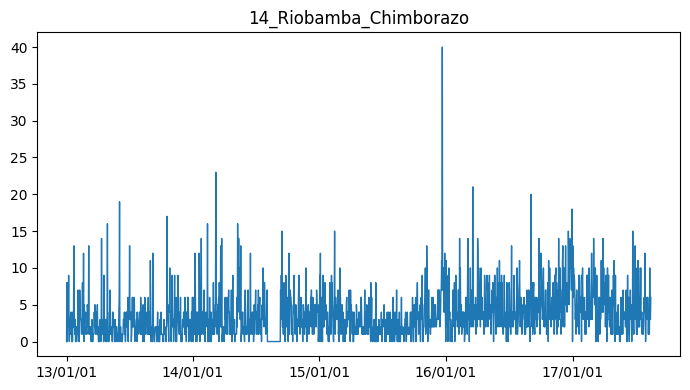

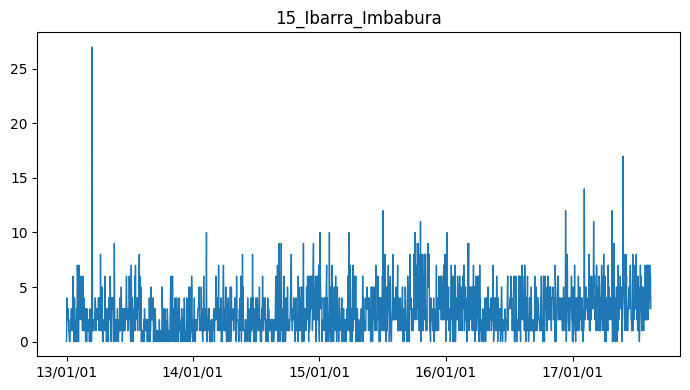

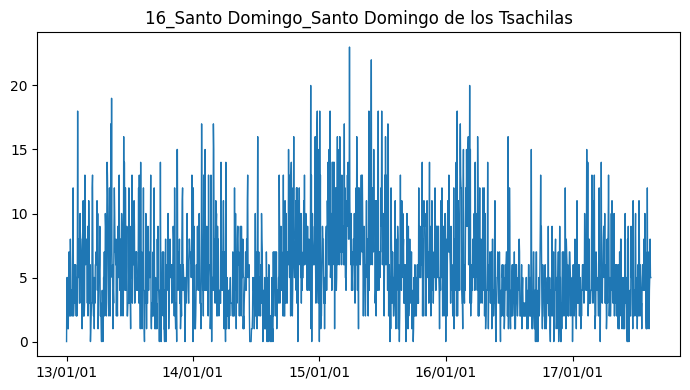

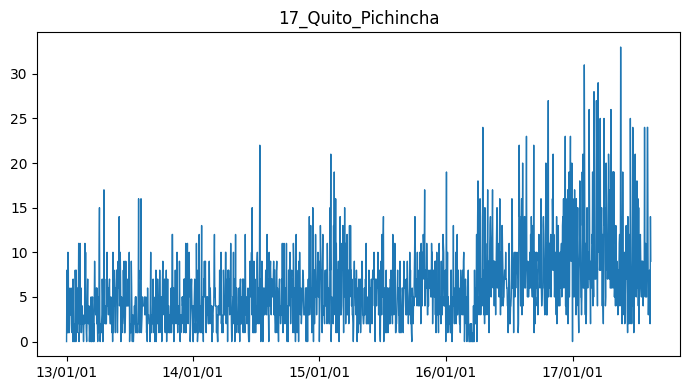

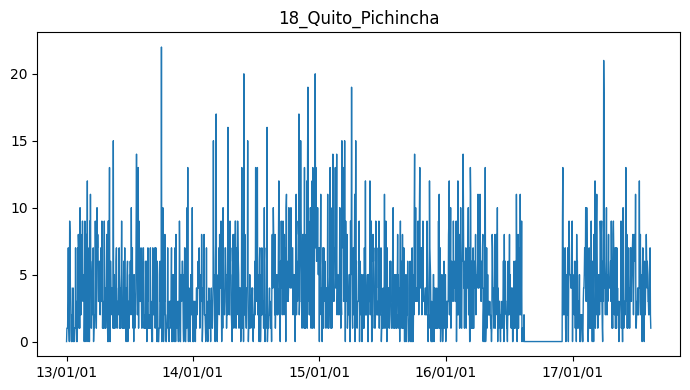

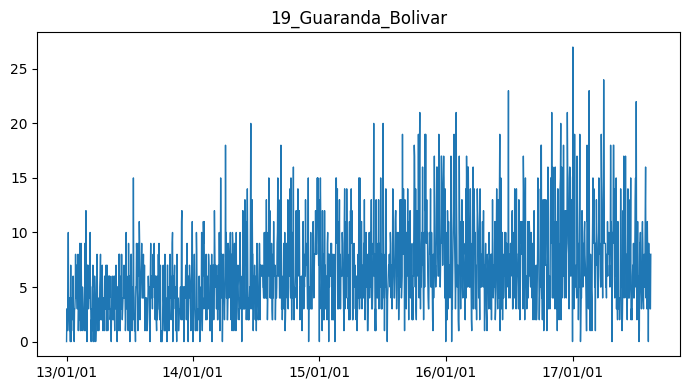

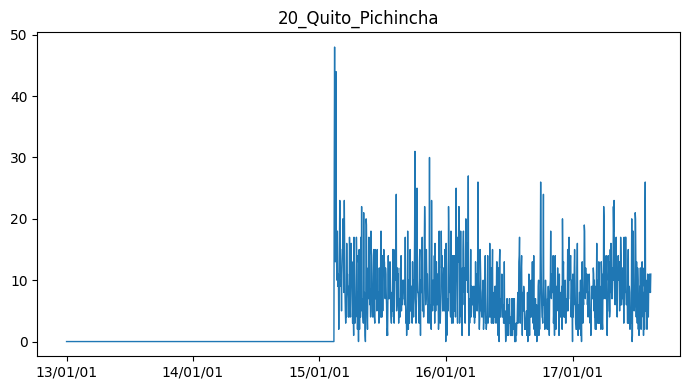

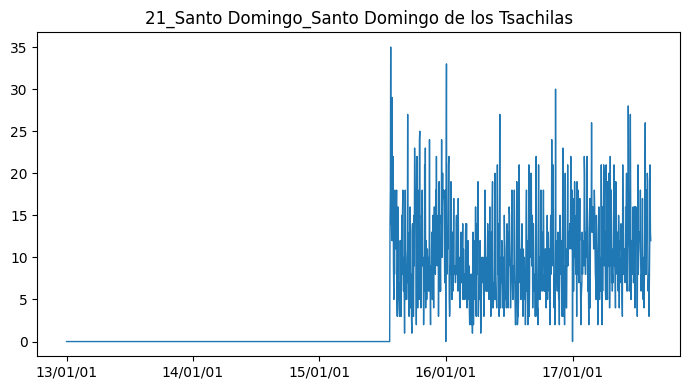

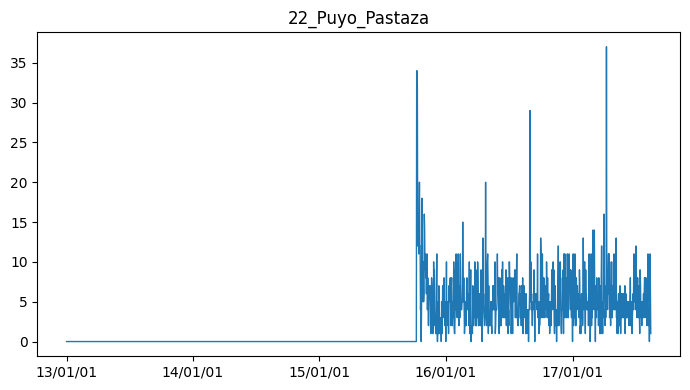

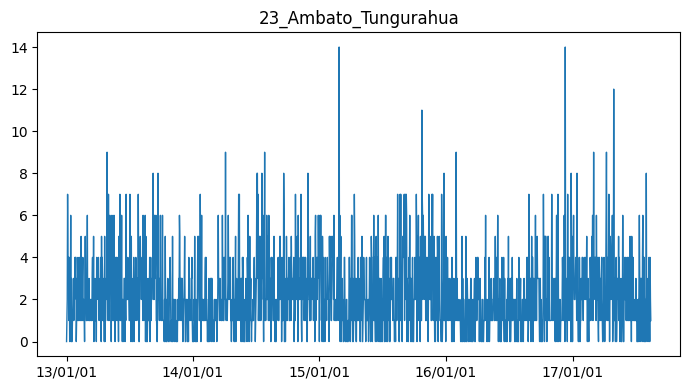

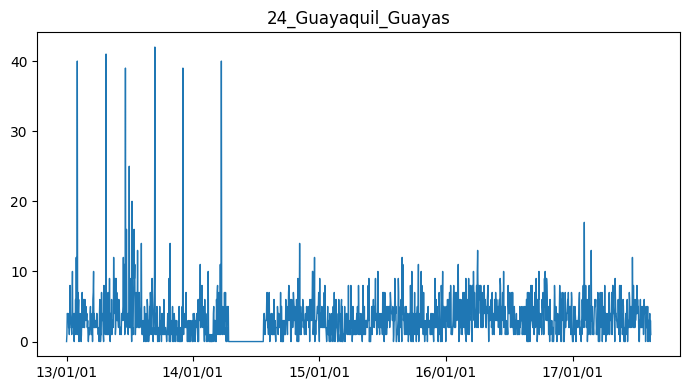

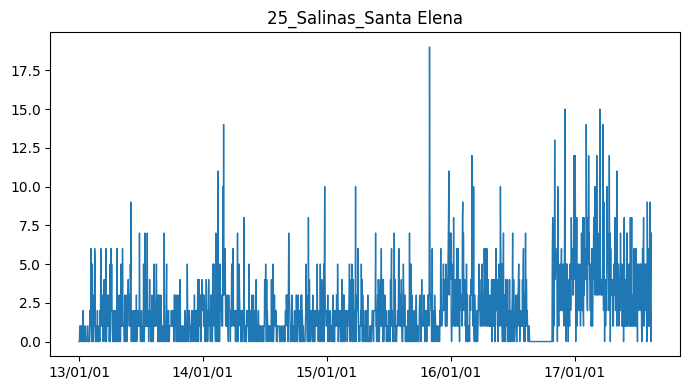

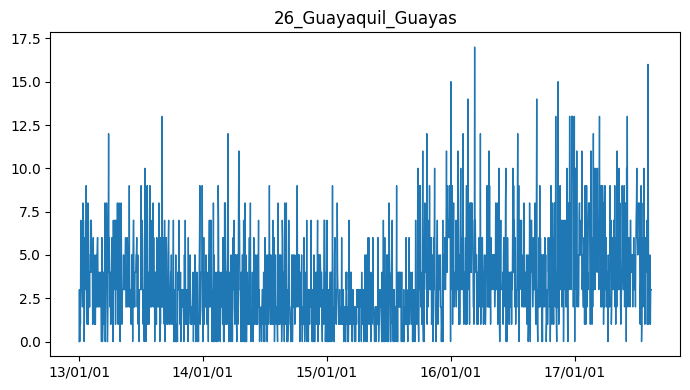

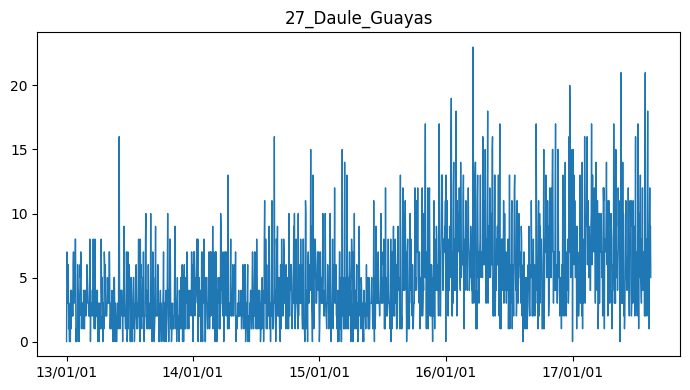

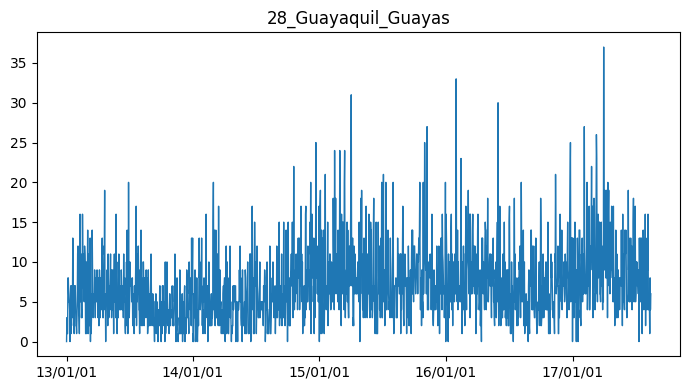

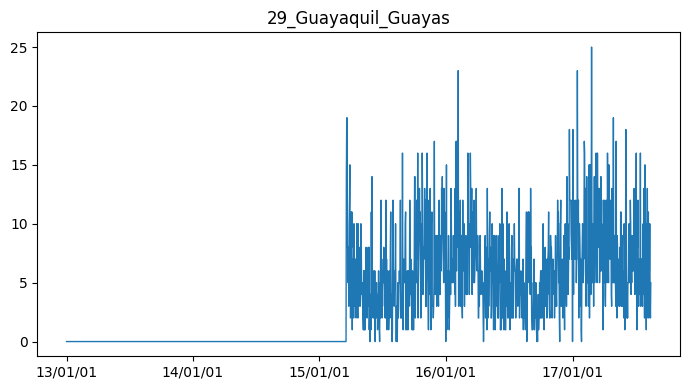

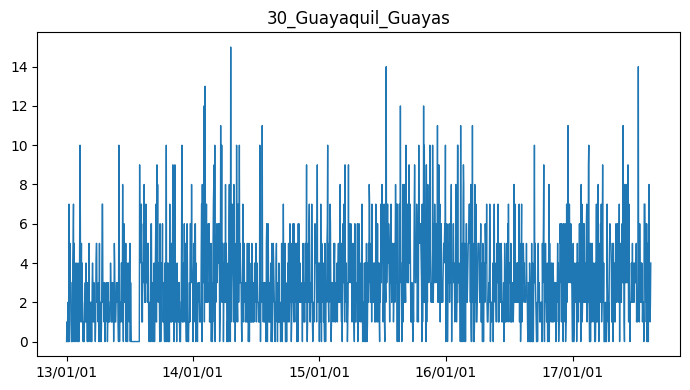

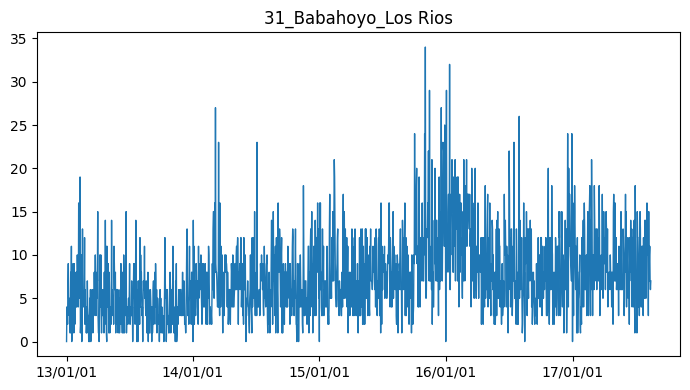

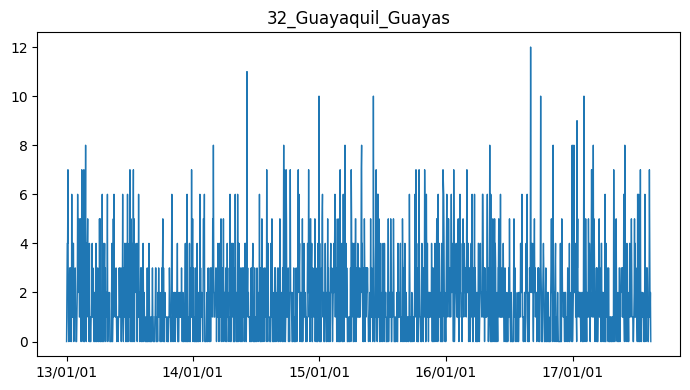

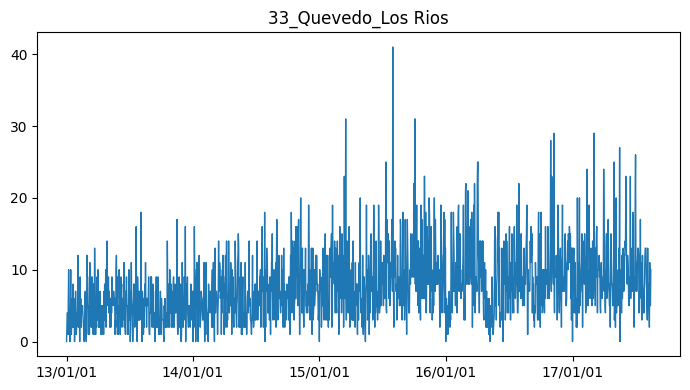

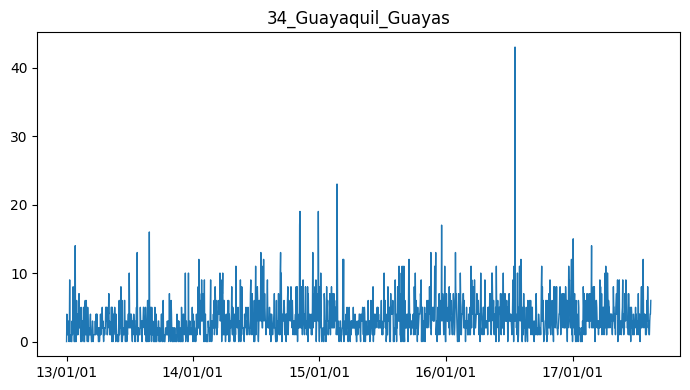

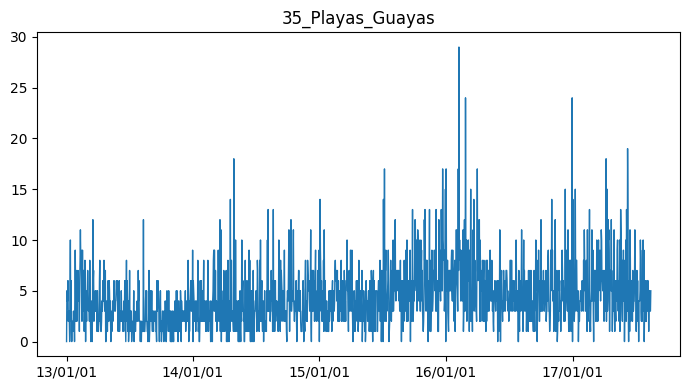

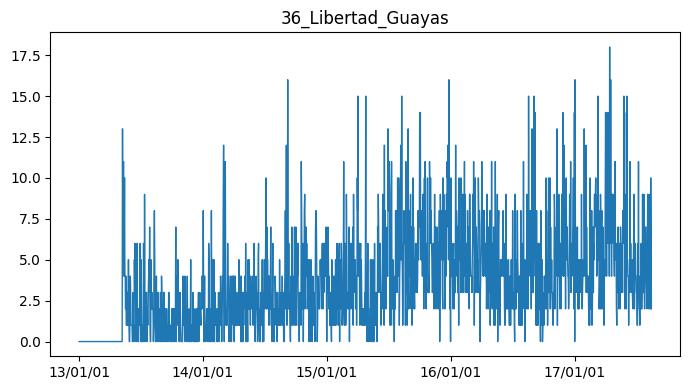

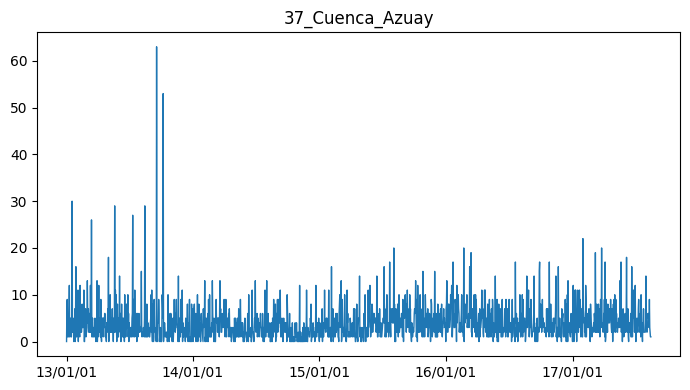

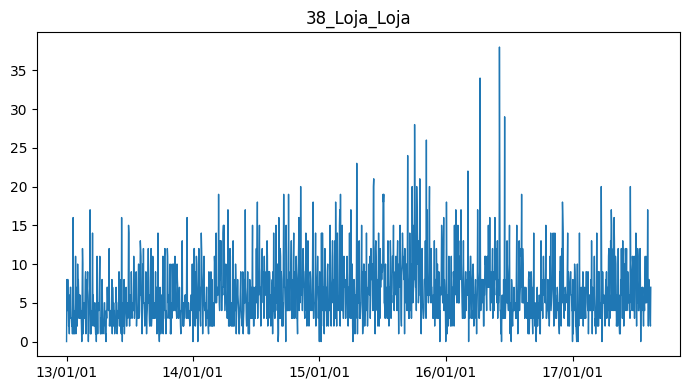

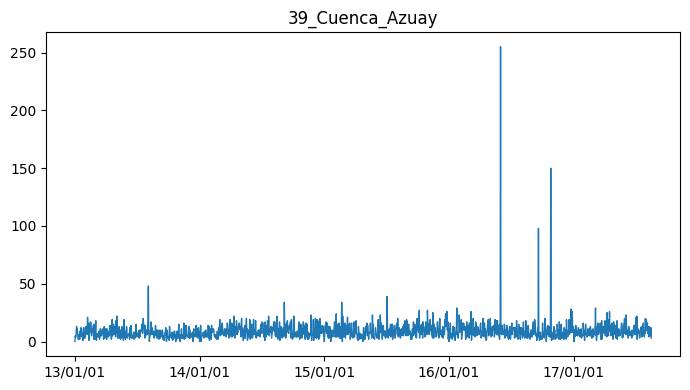

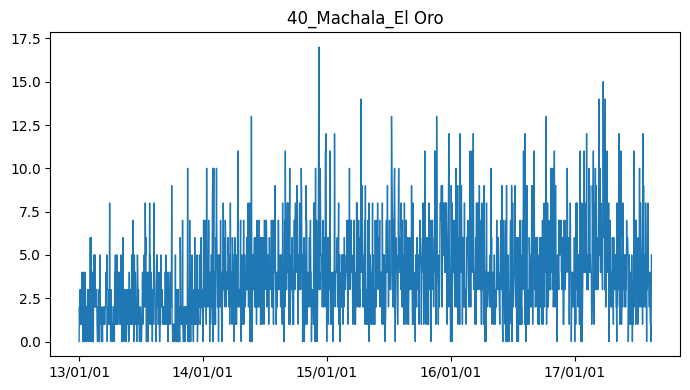

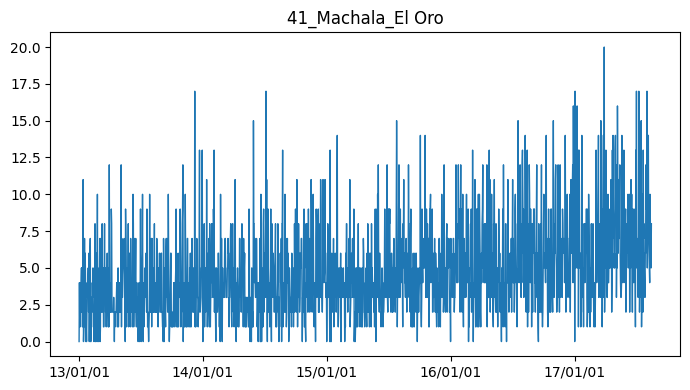

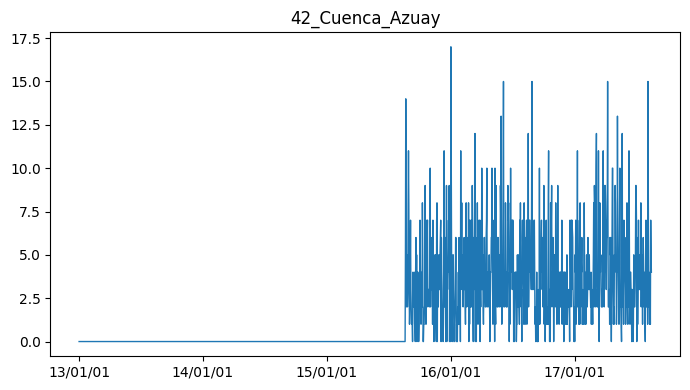

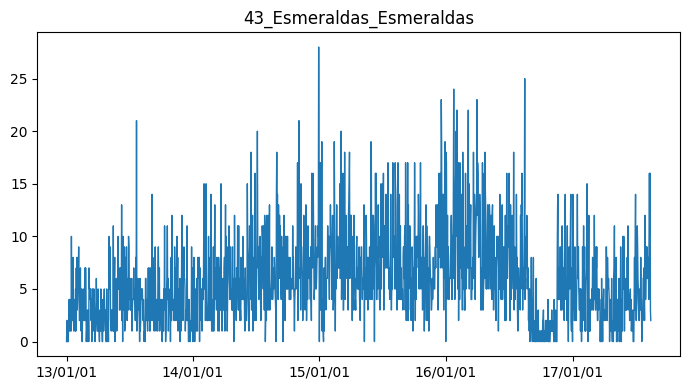

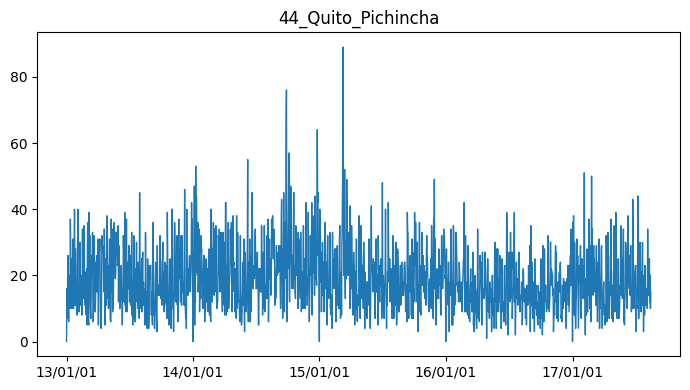

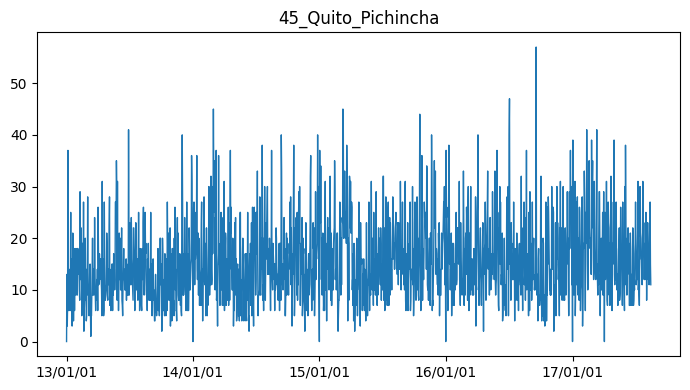

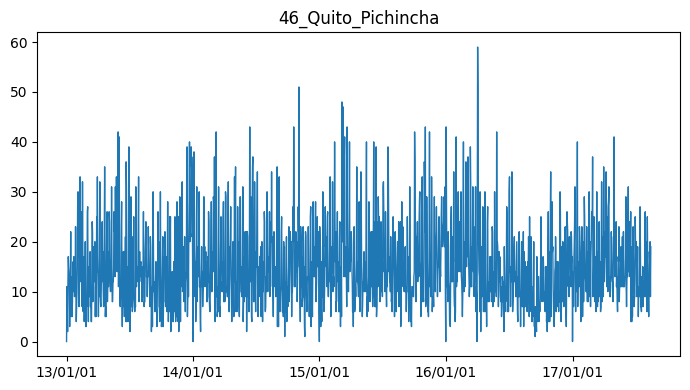

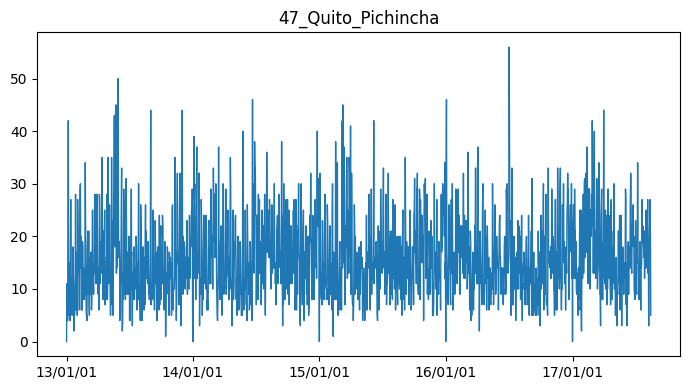

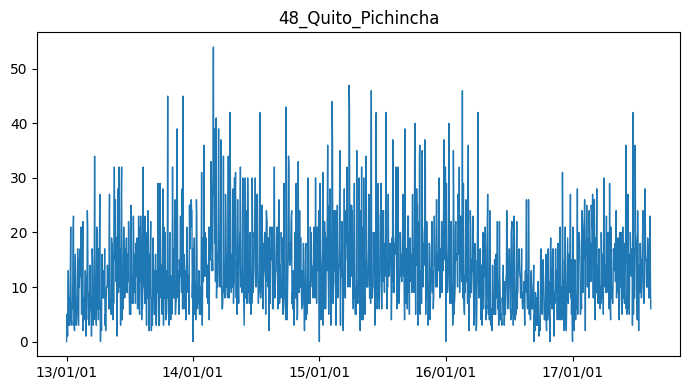

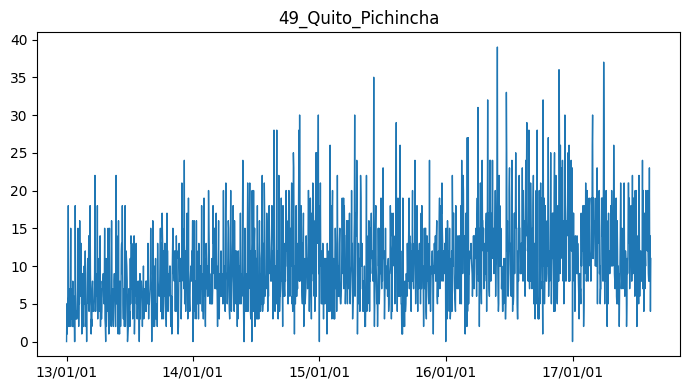

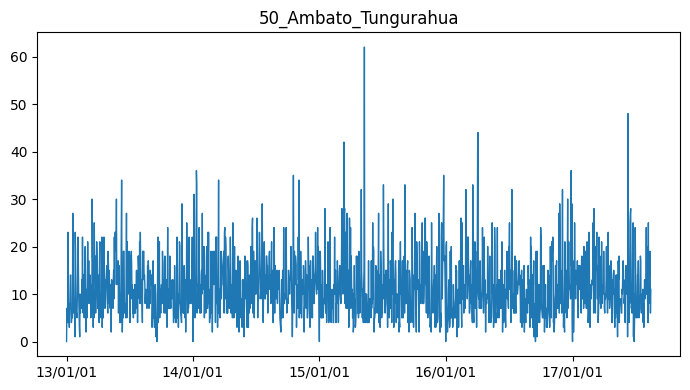

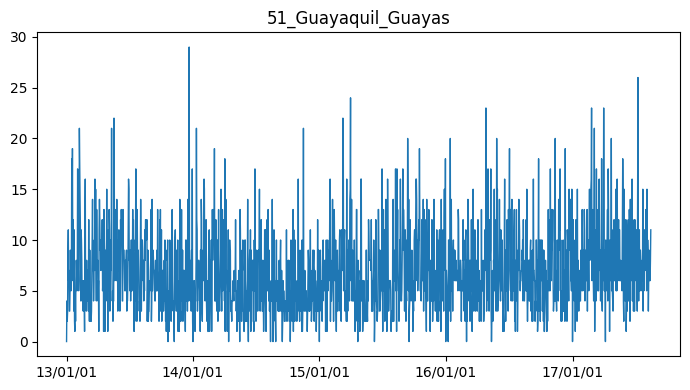

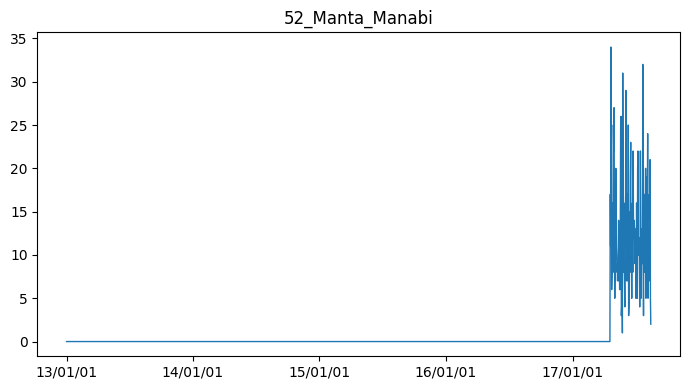

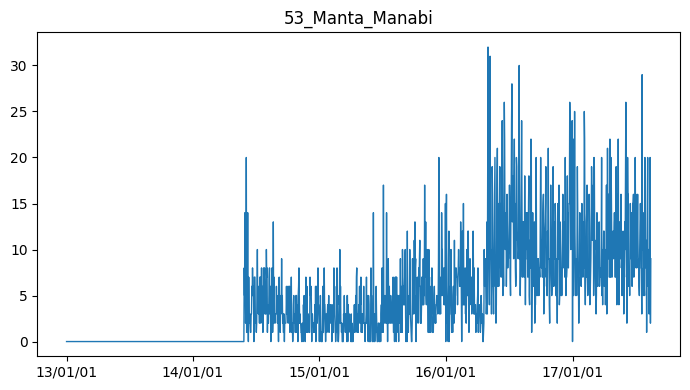

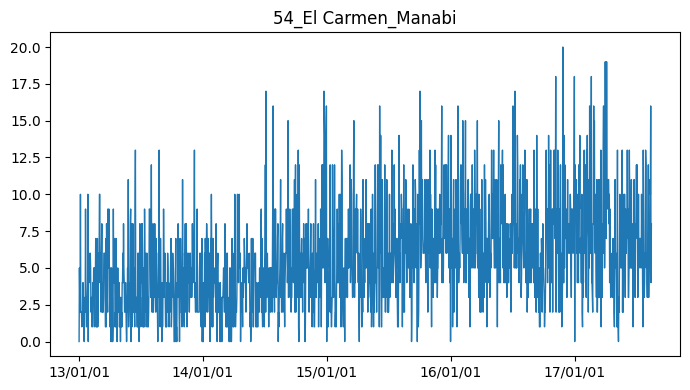

In [43]:
store_list = np.unique(df_train["store_nbr"])
target = "sales"

for store in store_list:
  fig = plt.figure(figsize=(7, 4), dpi=100)
  data = df_train.query(f" store_nbr=={store} and family=='AUTOMOTIVE' ")[target]
  x = data.index
  y = data.to_numpy()
  city = df_stores.query(f"store_nbr=={store}")["city"].iloc[0]
  state = df_stores.query(f"store_nbr=={store}")["state"].iloc[0]
  title = f"{store}_{city}_{state}"
  ax = fig.add_subplot(111)
  ax.plot(x, y, linewidth=1.0)
  ax.xaxis.set_major_formatter(DateFormatter("%y/%m/%d"))
  ax.set_title(title, fontsize=12)
  fig.tight_layout()
  plt.show()
plt.close()

In [9]:
np.unique(df["store_nbr"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54])

In [11]:
np.unique(df["family"]), len(np.unique(df["family"]))

(array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
        'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
        'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
        'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
        'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
        'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
        'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
        'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
        'SEAFOOD'], dtype=object), 33)

In [15]:
len(df.query("store_nbr==1 and family=='BEAUTY'"))

1684

In [16]:
len(df.query("store_nbr==14 and family=='PRODUCE'"))

1684